In [16]:
from urllib.request import urlretrieve
import os
import pandas as pd
import numpy as np
import matplotlib.style as stl
stl.use('dark_background')

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
url_circuits = 'https://gist.githubusercontent.com/harikanth-m/f15b47aeab0d75c128824d0f72821db1/raw/circuits.csv'
url_const_results = 'https://gist.githubusercontent.com/harikanth-m/f41f068dca8a309c81a04c6a45fecf58/raw/constructor_results.csv'
url_const_standings = 'https://gist.githubusercontent.com/harikanth-m/ccf0bd917f013d34928ae8c9b695059c/raw/constructor_standings.csv'
url_const = 'https://gist.githubusercontent.com/harikanth-m/f128413f4bff5c3c901b9a8c599a78b9/raw/constructors.csv'
url_driver_standings = 'https://gist.githubusercontent.com/harikanth-m/fcdb3e6650972ee6f0db07288074b0b7/raw/driver_standings.csv'
url_drivers = 'https://gist.githubusercontent.com/harikanth-m/d37be6c8c871300822bf8676e2206d9b/raw/drivers.csv'
url_lap_times = 'https://gist.githubusercontent.com/harikanth-m/61770032a57dd013651163142589b2bc/raw/lap_times.csv'
url_pit_stops = 'https://gist.githubusercontent.com/harikanth-m/45d94ae5a8b8e7f0cace662cc7942d04/raw/pit_stops.csv'
url_qualifying = 'https://gist.githubusercontent.com/harikanth-m/08f55f6687874c5a0bf01790c477e4bc/raw/qualifying.csv'
url_races = 'https://gist.githubusercontent.com/harikanth-m/9382cffceb1264e246fae76e4989cc31/raw/races.csv'
url_results = 'https://gist.githubusercontent.com/harikanth-m/6b1b6e36d3709abf3b97fc703303471b/raw/results.csv'
url_status = 'https://gist.githubusercontent.com/harikanth-m/c1bb17485523243929c57f4f13d4fcba/raw/status.csv'
url_schema = 'https://gist.githubusercontent.com/harikanth-m/71f7fd19c8afba09ad99664ece517268/raw/f1db_schema.txt'

In [6]:
os.makedirs('./data', exist_ok=True)

In [7]:
urlretrieve(url_circuits, './data/circuits.csv')
urlretrieve(url_const_results, './data/constructor_results.csv')
urlretrieve(url_const_standings, './data/constructor_standings.csv')
urlretrieve(url_const, './data/constructors.csv')
urlretrieve(url_driver_standings,'./data/driver_standings.csv')
urlretrieve(url_drivers, './data/drivers.csv')
urlretrieve(url_lap_times, './data/lap_times.csv')
urlretrieve(url_pit_stops, './data/pit_stops.csv')
urlretrieve(url_qualifying, './data/qualifying.csv')
urlretrieve(url_races, './data/races.csv')
urlretrieve(url_results, './data/results.csv')
urlretrieve(url_status, './data/status.csv')
urlretrieve(url_schema, './data/f1db_schema.txt');

In [8]:
os.listdir('data')

['circuits.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'constructors.csv',
 'driver_standings.csv',
 'drivers.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'status.csv',
 'f1db_schema.txt']

In [9]:
schema = open('./data/f1db_schema.txt', 'r')
print(schema.read())

+----------------------+
| Tables_in_f1db       |
+----------------------+
| circuits             |
| constructorResults   |
| constructorStandings |
| constructors         |
| driverStandings      |
| drivers              |
| lapTimes             |
| pitStops             |
| qualifying           |
| races                |
| results              |
| seasons              |
| status               |
+----------------------+

circuits.csv
+------------+--------------+------+-----+---------+----------------+
| Field      | Type         | Null | Key | Default | Extra          |
+------------+--------------+------+-----+---------+----------------+
| circuitId  | int(11)      | NO   | PRI | NULL    | auto_increment |
| circuitRef | varchar(255) | NO   |     |         |                |
| name       | varchar(255) | NO   |     |         |                |
| location   | varchar(255) | YES  |     | NULL    |                |
| country    | varchar(255) | YES  |     | NULL    |                |
|

In [10]:
races_raw_df = pd.read_csv('data/races.csv')
races_raw_df

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1030,1043,2020,13,21,Emilia Romagna Grand Prix,2020-11-01,13:10:00,https://en.wikipedia.org/wiki/2020_Emilia_Roma...
1031,1044,2020,14,5,Turkish Grand Prix,2020-11-15,13:10:00,https://en.wikipedia.org/wiki/2020_Turkish_Gra...
1032,1045,2020,15,3,Bahrain Grand Prix,2020-11-29,15:10:00,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...
1033,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,15:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


In [11]:
races_raw_df = races_raw_df.sort_values('date')
races_raw_df

,raceId,year,round,circuitId,name,date,time,url
832,833,1950,1,9,British Grand Prix,1950-05-13,\N,http://en.wikipedia.org/wiki/1950_British_Gran...
833,834,1950,2,6,Monaco Grand Prix,1950-05-21,\N,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
834,835,1950,3,19,Indianapolis 500,1950-05-30,\N,http://en.wikipedia.org/wiki/1950_Indianapolis...
835,836,1950,4,66,Swiss Grand Prix,1950-06-04,\N,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
836,837,1950,5,13,Belgian Grand Prix,1950-06-18,\N,http://en.wikipedia.org/wiki/1950_Belgian_Gran...
...,...,...,...,...,...,...,...,...
1030,1043,2020,13,21,Emilia Romagna Grand Prix,2020-11-01,13:10:00,https://en.wikipedia.org/wiki/2020_Emilia_Roma...
1031,1044,2020,14,5,Turkish Grand Prix,2020-11-15,13:10:00,https://en.wikipedia.org/wiki/2020_Turkish_Gra...
1032,1045,2020,15,3,Bahrain Grand Prix,2020-11-29,15:10:00,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...
1033,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,15:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


In [12]:
races_df = races_raw_df[races_raw_df.date <= '2022-04-10']

In [13]:
races_completed = len(races_df)
print('The number of chequered flags waved in F1 so far (until 2022 Australian GP) is {}.'.format(races_completed))

The number of chequered flags waved in F1 so far (until 2022 Australian GP) is 1035.


Text(0.5, 1.0, 'Championship races per seasons')

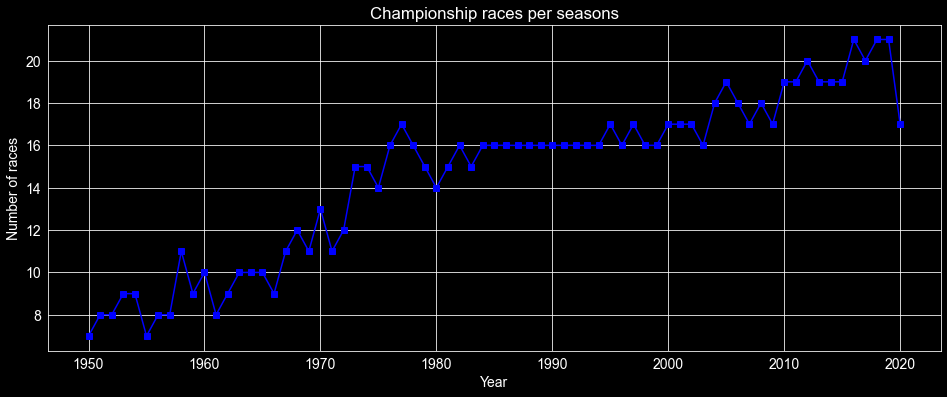

In [19]:
idx = races_df.groupby(['year'])['date'].transform(max) == races_df['date'] # Finds if the race index is last of the season
season_finale = races_df[idx].rename(columns = {'round' : 'tot_races'}) 
season_finale = season_finale[season_finale.year != 2022] # A new data frame with season-ending races only, excluding the 2020 season

# Plotting
plt.figure(figsize=(16, 6))

plt.plot(season_finale.year, season_finale.tot_races, 's-b')
plt.xlabel('Year')
plt.ylabel('Number of races')
plt.title("Championship races per seasons")